In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from yahoofinancials import YahooFinancials
%matplotlib inline

# Download Data

In [2]:
start_date = '2022-01-01'
end_date = '2022-12-05'
stock_code = 'ETH-USD'

In [3]:
stock_data = YahooFinancials(stock_code).get_historical_price_data(start_date, end_date, 'daily')
price_data = stock_data[stock_code]['prices']

In [4]:
columns = ['formatted_date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']
new_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# order dataframe columns
df = pd.DataFrame(data=price_data)[columns]
# rename dataframe columns
df = df.rename(index=str, columns=dict(zip(columns, new_columns)))

In [5]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466
1,2022-01-02,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548
2,2022-01-03,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
3,2022-01-04,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
4,2022-01-05,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502
5,2022-01-06,3549.708984,3549.708984,3335.376709,3418.408203,3418.408203,24293791313
6,2022-01-07,3417.837891,3420.461914,3117.381348,3193.210449,3193.210449,24494179209
7,2022-01-08,3193.502441,3240.304443,3020.880859,3091.972656,3091.972656,16037732700
8,2022-01-09,3091.696289,3206.790771,3075.911377,3157.751465,3157.751465,12334683863
9,2022-01-10,3157.570557,3177.213379,2947.683594,3083.097900,3083.097900,19535744145


In [6]:
# save to 'data' directory
df.to_csv('../data/{}_{}.csv'.format(stock_code, start_date[:4]))

Alternatively, we can go to https://finance.yahoo.com/ to look up a stock and download its historical data by setting the stock's time period and frequency.

# Visualize Data

In [7]:
df = pd.read_csv('../data/{}_{}.csv'.format(stock_code, start_date[:4]))
df.head(10)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466
1,1,2022-01-02,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548
2,2,2022-01-03,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
3,3,2022-01-04,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
4,4,2022-01-05,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502
5,5,2022-01-06,3549.708984,3549.708984,3335.376709,3418.408203,3418.408203,24293791313
6,6,2022-01-07,3417.837891,3420.461914,3117.381348,3193.210449,3193.210449,24494179209
7,7,2022-01-08,3193.502441,3240.304443,3020.880859,3091.972656,3091.972656,16037732700
8,8,2022-01-09,3091.696289,3206.790771,3075.911377,3157.751465,3157.751465,12334683863
9,9,2022-01-10,3157.570557,3177.213379,2947.683594,3083.097900,3083.097900,19535744145


In [8]:
df.shape

(339, 8)

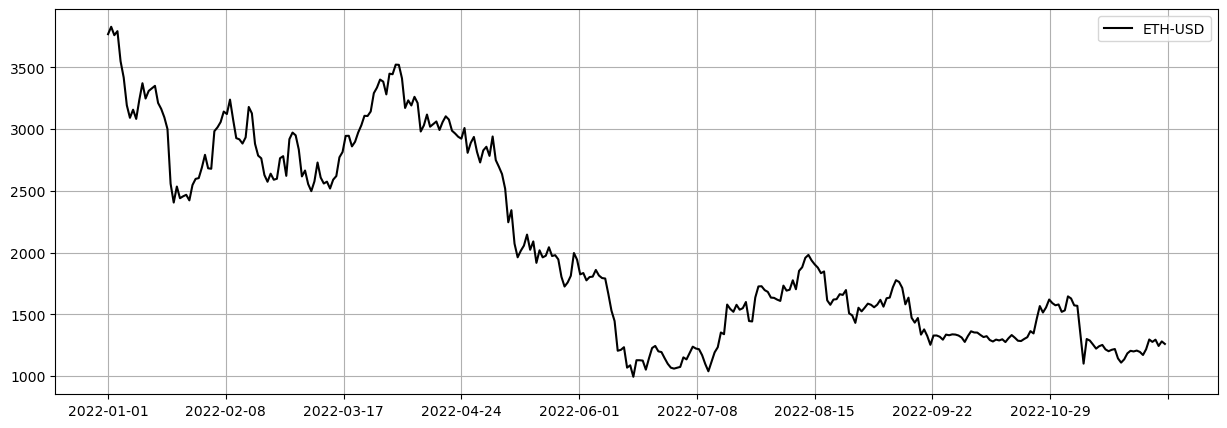

In [11]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df['Date'], df['Close'], color='black', label=f'{stock_code}')
plt.xticks(np.linspace(0, len(df), 10))
plt.legend()
plt.grid()

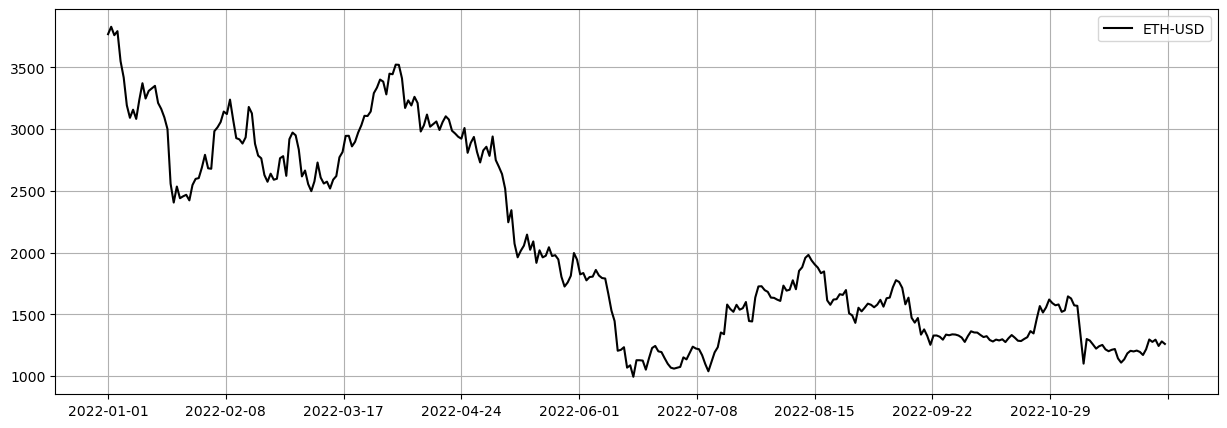

In [13]:
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(df['Date'], df['Close'], color='black', label=f'{stock_code}')
ax.set_xticks(np.linspace(0, len(df), 10))
ax.legend()
ax.grid()